# Linear Regression

- Morning
  - How do I find the line that minimizes squared error?
  - What distributional assumptions does Linear Regression make?
  - What statistical claims (hypotheses) do I get to make about regression coefficients & predictions?
  - How can I check the validity of LR's assumptions?
  - **Always Plot The Residuals**
    - Are they homoscedastic?
    - Are they normal?
  - What is multicollinearity and how do I deal with it?
  
- Afternoon
  - What are some more evaluation metrics?
  - How do I interpret coefficients for categorical features?
  - How can I transform my data so that it is more linear & homoscedastic?

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

Let's look at the `cars` data set

In [2]:
cars = pd.read_csv('data/cars_multivariate.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


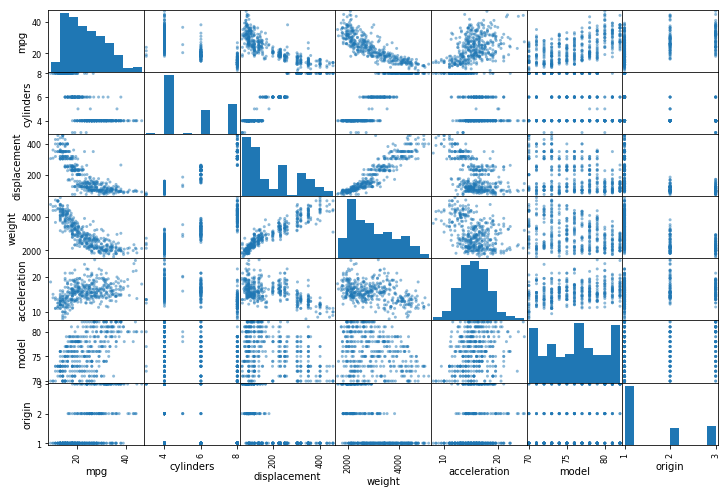

In [6]:
pd.plotting.scatter_matrix(cars, figsize=(12,8));

## Linear Regression

What is it? We are hypothesizing a **linear relationship** between a *target* (or 'endogenous' variable) and some *features* (predictors, or 'exogenous' variables).

In the case of one feature, we are looking to quantify the relationship of the form
$$ y = mx + b $$

Let's select `mpg` as our target and `weight` as our predictor.

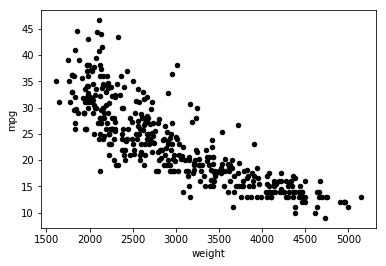

In [7]:
y = cars['mpg']
X = cars['weight']

plt.scatter(X,y, color='k', s=20)
plt.xlabel('weight')
plt.ylabel('mpg');

There are lots of lines we could draw... how do we pick a "best" line?

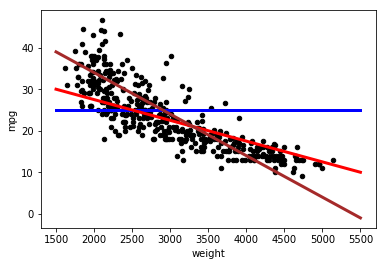

In [8]:
xx = np.linspace(1500,5500)
line0 = 0*xx + 25
line1 = (-1/200)*(xx - 1500) + 30
line2 = (-1/100)*(xx - 1500) + 39

plt.scatter(X,y, color='k', s=20)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.plot(xx, line0, color='b', lw=3)
plt.plot(xx, line1, color='r', lw=3)
plt.plot(xx, line2, color='brown', lw=3);

Let's call our line $\hat{y}$. For any point $x_i$, we have our observed value $y_i$ and our value predicted from our line $$\hat{y}_i = \beta_0 + \beta_1 x_i$$

The *residual* is the distance between our predicted value and the actual value
$$r_i = y_i - \hat{y}_i$$

Let's find the line that minimizes the total **sum of squared residuals** (SSR)
$$ SSR = \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

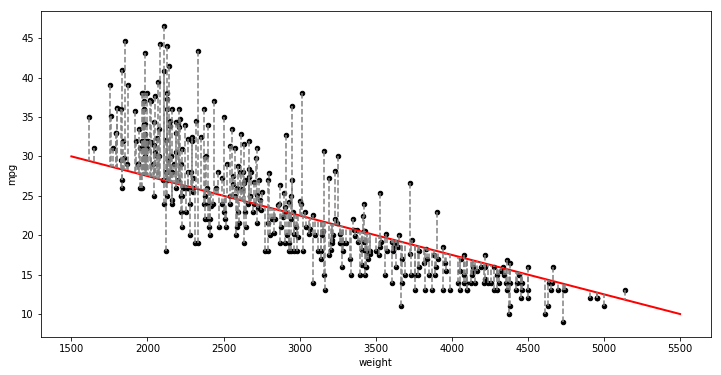

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(X,y, color='k', s=20)
plt.xlabel('weight')
plt.ylabel('mpg')

b0 = (1500/200) + 30
b1 = (-1/200)

line1 = b0 + b1*xx
plt.plot(xx, line1, color='r', lw=2)

for x_i, y_i in zip(X,y):
    plt.plot([x_i, x_i], [y_i, b1*x_i+b0], color='gray', linestyle='dashed')

#### Fun exercise: show that the line that minimizes the SSR in the single feature case is

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$$

$$\beta_0 = \bar{y} - \hat{\beta}_1\bar{x}$$

## Using statsmodels

In [12]:
y = cars['mpg']
X = sm.add_constant(cars['weight'])

In [13]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [14]:
X.head()

,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0


In [15]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [19]:
simple_model = sm.OLS(y, X)
simple_results = simple_model.fit()
simple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Tue, 19 Jun 2018   Prob (F-statistic):          2.97e-103
Time:                        10:03:31   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
simple_results.params

const     46.317364
weight    -0.007677
dtype: float64

In [21]:
X.head()

,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0


In [23]:
simple_results.predict([1, 3400])

array([ 20.2168902])

In [26]:
simple_results.predict(sm.add_constant(cars['weight'])).head()

0    19.418523
1    17.967643
2    19.940532
3    19.963562
4    19.840736
dtype: float64

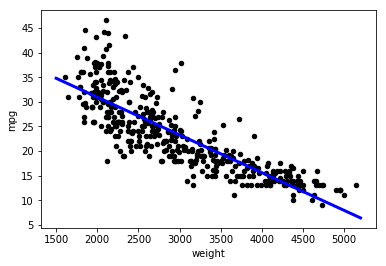

In [29]:
xx = np.linspace(1500,5200)
best_line = simple_results.params['const'] + simple_results.params['weight']*xx

plt.scatter(X['weight'],y, color='k', s=20)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.plot(xx, best_line, color='b', lw=3);

In [31]:
simple_results.predict([1,-20000])

array([ 199.8495657])

## What about multiple features?

Assume we have $p$ features.

Then the linear relationship we are assuming has the form
$$ y = \beta_0*1 + \beta_1* X_1 + \beta_2*X_2 + ... + \beta_p *X_p $$

which we can write as the matrix product
$$Y = X\beta$$
where $Y$ is an $n \times 1$ column vector, $X$ is an $n \times (p+1)$ feature matrix (we've added a column of ones to encode the intercept term), and $\beta$ is a $(p+1) \times 1$ column vector

#### Even more fun exercise
Show that the vector of parameter values $\hat{\beta}$ that minimizes the SSR in the general case is the solution to the matrix equation

 $$ X^T X \hat{\beta} = X^T y $$
 
 Which can also be written as $\hat{\beta} = (X^TX)^{-1}X^Ty$
 
 



## What is regression in more than one dimension?

Let's plot `mpg` against `weight` and `acceleration`

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

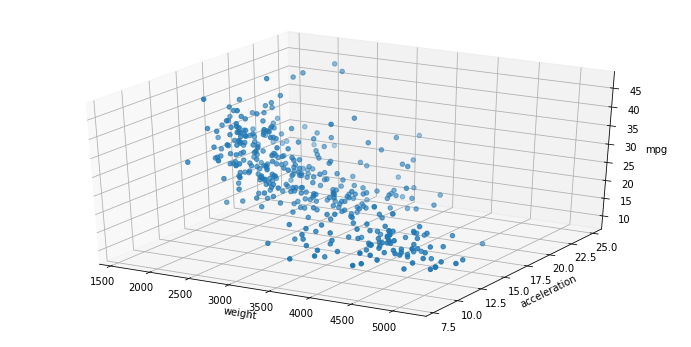

In [33]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cars['weight'], cars['acceleration'], cars['mpg'])
ax.set_zlabel('mpg')
ax.set_xlabel('weight')
ax.set_ylabel('acceleration');

Linear regression then finds the **plane** that minimizes SSR.

In [34]:
y = cars['mpg']
X = sm.add_constant(cars[['weight','acceleration']])
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     457.0
Date:                Tue, 19 Jun 2018   Prob (F-statistic):          1.69e-103
Time:                        10:24:47   Log-Likelihood:                -1144.2
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     395   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3998      1.865     22.201      0.000      37.734      45.066
weight          -0.0073      0.000    -26.131      0.000      -0.008      -0.007
acceleration     0.2508      0.086      2.909      0.004       0.081       0.420
==============================================================================
Omnibus:                       30.694   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.296
Skew:                           0.625   Prob(JB):                     4.83e-09
Kurtosis:                       3.864   Cond. No.                     2.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
results.params

const           41.399828
weight          -0.007336
acceleration     0.250816
dtype: float64

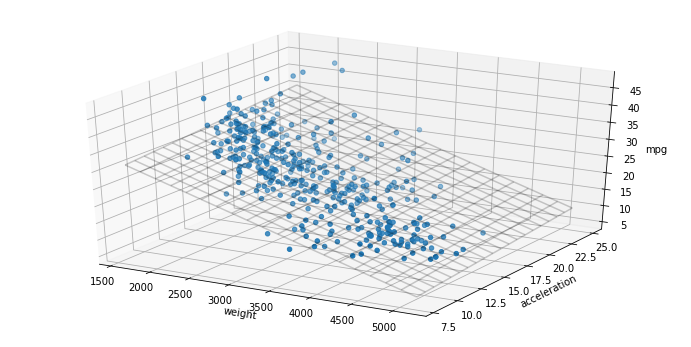

In [36]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cars['weight'], cars['acceleration'], cars['mpg']);
ax.set_zlabel('mpg')
ax.set_xlabel('weight')
ax.set_ylabel('acceleration');

xx1 = np.linspace(cars['weight'].min(), cars['weight'].max(), 20)
xx2 = np.linspace(cars['acceleration'].min(), cars['acceleration'].max(), 20)
xx1, xx2 = np.meshgrid(xx1, xx2)
best_plane = (results.params['const'] +
              results.params['weight']*xx1 +
              results.params['acceleration']*xx2)

# Plot the surface.
surf = ax.plot_wireframe(xx1, xx2, best_plane, color='k', alpha=0.2)


## What was all that other stuff in the summary?

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     457.0
Date:                Tue, 19 Jun 2018   Prob (F-statistic):          1.69e-103
Time:                        10:36:25   Log-Likelihood:                -1144.2
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     395   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3998      1.865     22.201      0.000      37.734      45.066
weight          -0.0073      0.000    -26.131      0.000      -0.008      -0.007
acceleration     0.2508      0.086      2.909      0.004       0.081       0.420
==============================================================================
Omnibus:                       30.694   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.296
Skew:                           0.625   Prob(JB):                     4.83e-09
Kurtosis:                       3.864   Cond. No.                     2.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $R^2$ : The "proportion of variance explained"

Let's for a moment refer to the variance of $y$ as "the total sum of squares"
$$ SST = \sum_i^N (y_i - \bar{y})^2 $$

Then we define $R^2$ as the percentage of that variance that has been "captured" by the regression line
$$
\begin{align}
    R^2 &:= 1 - \frac{SSR}{SST} \\
    &= 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    
$$

## p-values? Confidence intervals? WHAT'S GOING ON

It turns out we don't just want to solve an optimization problem.

We want to make **statistical claims** about this linear relationship. In order to do that, we need to assume a distribution, so here we go.

$$ y = \beta X + \epsilon $$
where
$$ \epsilon \sim Normal(0, \sigma^2) $$

Equivalently, we can write
$$ y \sim Normal(\beta X, \sigma^2) $$

Now all our null hypotheses have the form "Does $\beta_i = 0$ ?

$$ \hat{\beta} \sim Normal(\beta, \sqrt{(X^T X)^{-1}\sigma^2})$$


$$ \hat{\beta} \sim t(\beta, \sqrt{(X^T X)^{-1}\frac{\text{SSR}}{N - p}})$$

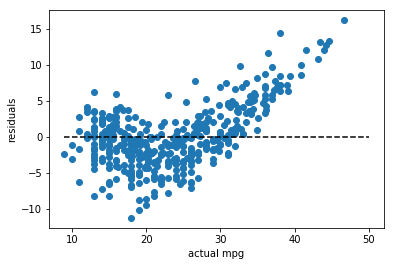

In [48]:
plt.scatter(y, results.resid)
plt.hlines(0,9, 50, 'k', linestyle='dashed')
plt.xlabel('actual mpg')
plt.ylabel('residuals');

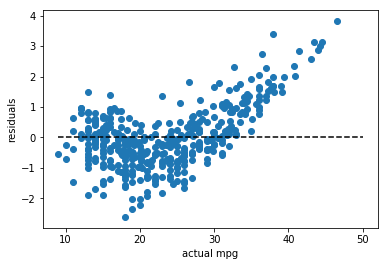

In [50]:
plt.scatter(y, results.outlier_test()['student_resid'])
plt.hlines(0,9, 50, 'k', linestyle='dashed')
plt.xlabel('actual mpg')
plt.ylabel('residuals');

In [51]:
y = cars['mpg']
X = sm.add_constant(cars[['weight','acceleration']])
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     457.0
Date:                Tue, 19 Jun 2018   Prob (F-statistic):          1.69e-103
Time:                        11:18:21   Log-Likelihood:                -1144.2
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     395   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.3998      1.865     22.201      0.000      37.734      45.066
weight          -0.0073      0.000    -26.131      0.000      -0.008      -0.007
acceleration     0.2508      0.086      2.909      0.004       0.081       0.420
==============================================================================
Omnibus:                       30.694   Durbin-Watson:                   0.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.296
Skew:                           0.625   Prob(JB):                     4.83e-09
Kurtosis:                       3.864   Cond. No.                     2.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
y = cars['mpg']
X = sm.add_constant(cars[['weight','acceleration', 'displacement']])
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     307.0
Date:                Tue, 19 Jun 2018   Prob (F-statistic):          1.01e-102
Time:                        11:18:24   Log-Likelihood:                -1142.7
No. Observations:                 398   AIC:                             2293.
Df Residuals:                     394   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.2991      1.861     22.186      0.000      37.639      44.959
weight          -0.0062      0.001     -8.368      0.000      -0.008      -0.005
acceleration     0.1739      0.098      1.783      0.075      -0.018       0.366
displacement    -0.0109      0.007     -1.675      0.095      -0.024       0.002
==============================================================================
Omnibus:                       36.015   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.328
Skew:                           0.681   Prob(JB):                     5.28e-11
Kurtosis:                       4.000   Cond. No.                     2.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""